## Knowledge Discovery and Data Mining Final Project
### Airline Passenger Satisfaction
*   Group Member:
  1.   Abhishek Esakkiappan ( 20032119 )
  2.   Havishey Jotaniya ( 20030480 )
  3.   Vanshaj Tyagi ( 20029455 )

This notebook includes:
- Detailed steps of the analysis or computations.
- Results and conclusions.

## Introduction

This notebook includes the following sections:
- Purpose of the analysis or computations
- Step-by-step explanations of the code
- Results and insights


## Results

## Table of Contents

1. Introduction
2. Code and Analysis
3. Results
4. Conclusion

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from statistics import harmonic_mean
import warnings

warnings.filterwarnings('ignore')


# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')




In [2]:
# Displaying the rows
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# This cell performs the following tasks:
# - Add an explanation of the specific code here.
# - Mention the purpose or key steps involved.

test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


Missing values before cleaning (Train Data):
 Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int6

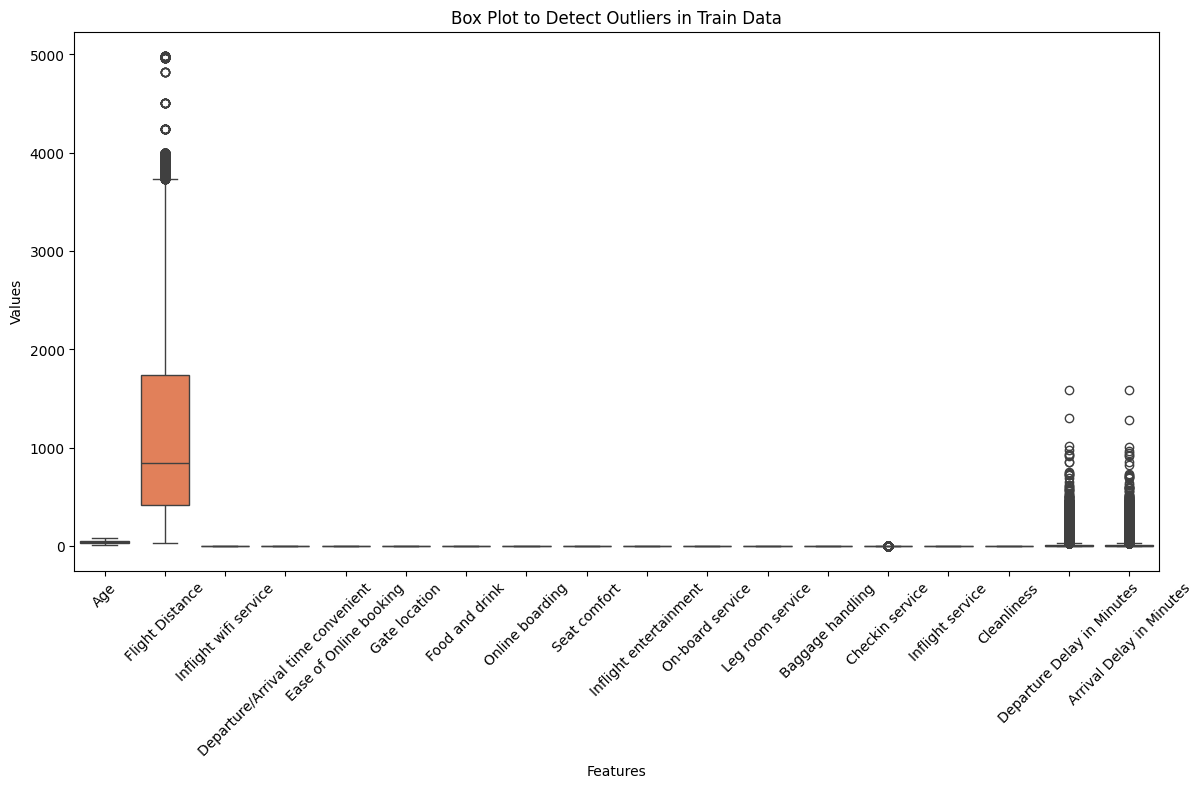

Missing values after filling nulls (Train Data):
 Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
Missing values before cleaning (Test Dat

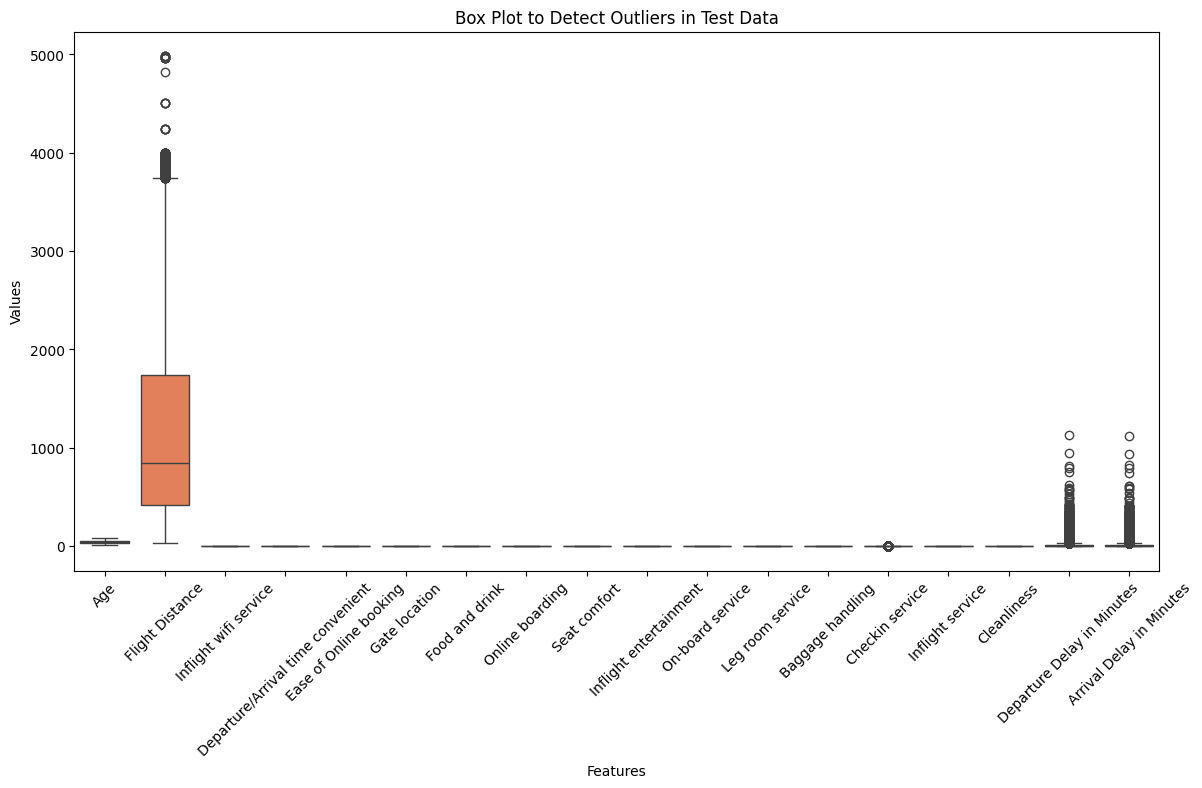

Missing values after filling nulls (Test Data):
 Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [4]:

# Training a machine learning model.

def clean_data(data, dataset_name):
    # Drop unnecessary columns
    data = data.drop(columns=['Unnamed: 0', 'id'])
    print(f"Missing values before cleaning ({dataset_name}):\n", data.isnull().sum())

    # Box plot for each feature in initial data to visualize outliers
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=data)
    plt.title(f'Box Plot to Detect Outliers in {dataset_name}')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.show()

    # Fill missing values with median for numerical features
    imputer = SimpleImputer(strategy='median')
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_features] = imputer.fit_transform(data[numerical_features])

    # Fill missing values for categorical features with the most frequent value
    categorical_features = data.select_dtypes(include=['object']).columns
    imputer_cat = SimpleImputer(strategy='most_frequent')
    data[categorical_features] = imputer_cat.fit_transform(data[categorical_features])

    # Encode categorical variables
    categorical_cols = categorical_features
    for col in categorical_cols:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

    print(f"Missing values after filling nulls ({dataset_name}):\n", data.isnull().sum())

    # Normalize numeric columns
    numeric_cols = numerical_features
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

    return data

# Clean both datasets
cleaned_train_data = clean_data(train_data.copy(), "Train Data")
cleaned_test_data = clean_data(test_data.copy(), "Test Data")


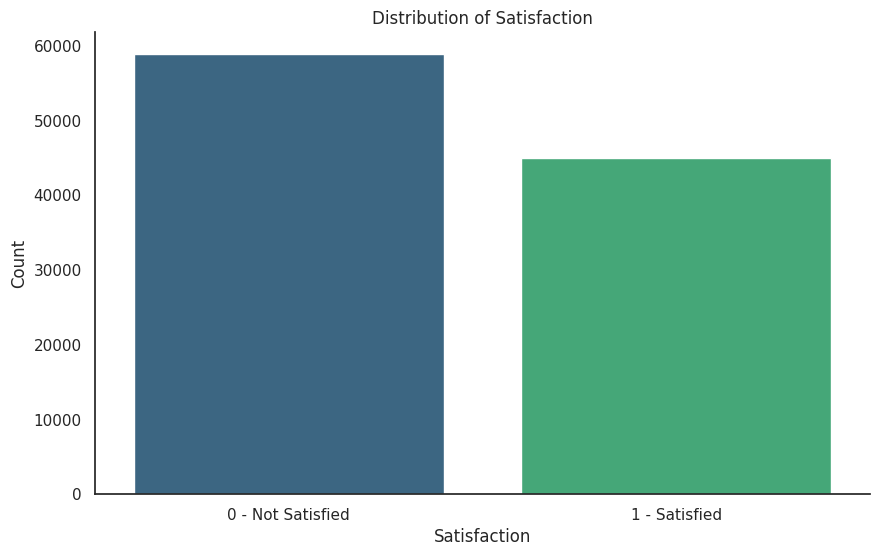

In [5]:
# Set the Seaborn style
sns.set(style="white")

# Create a custom label map
label_map = {0: '0 - Not Satisfied', 1: '1 - Satisfied'}

plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', data=cleaned_train_data, hue='satisfaction', palette='viridis', legend=False)
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
sns.despine()
plt.grid(False)


ax = plt.gca()  # Get the current Axes instance
ax.set_xticklabels([label_map.get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()])

plt.show()




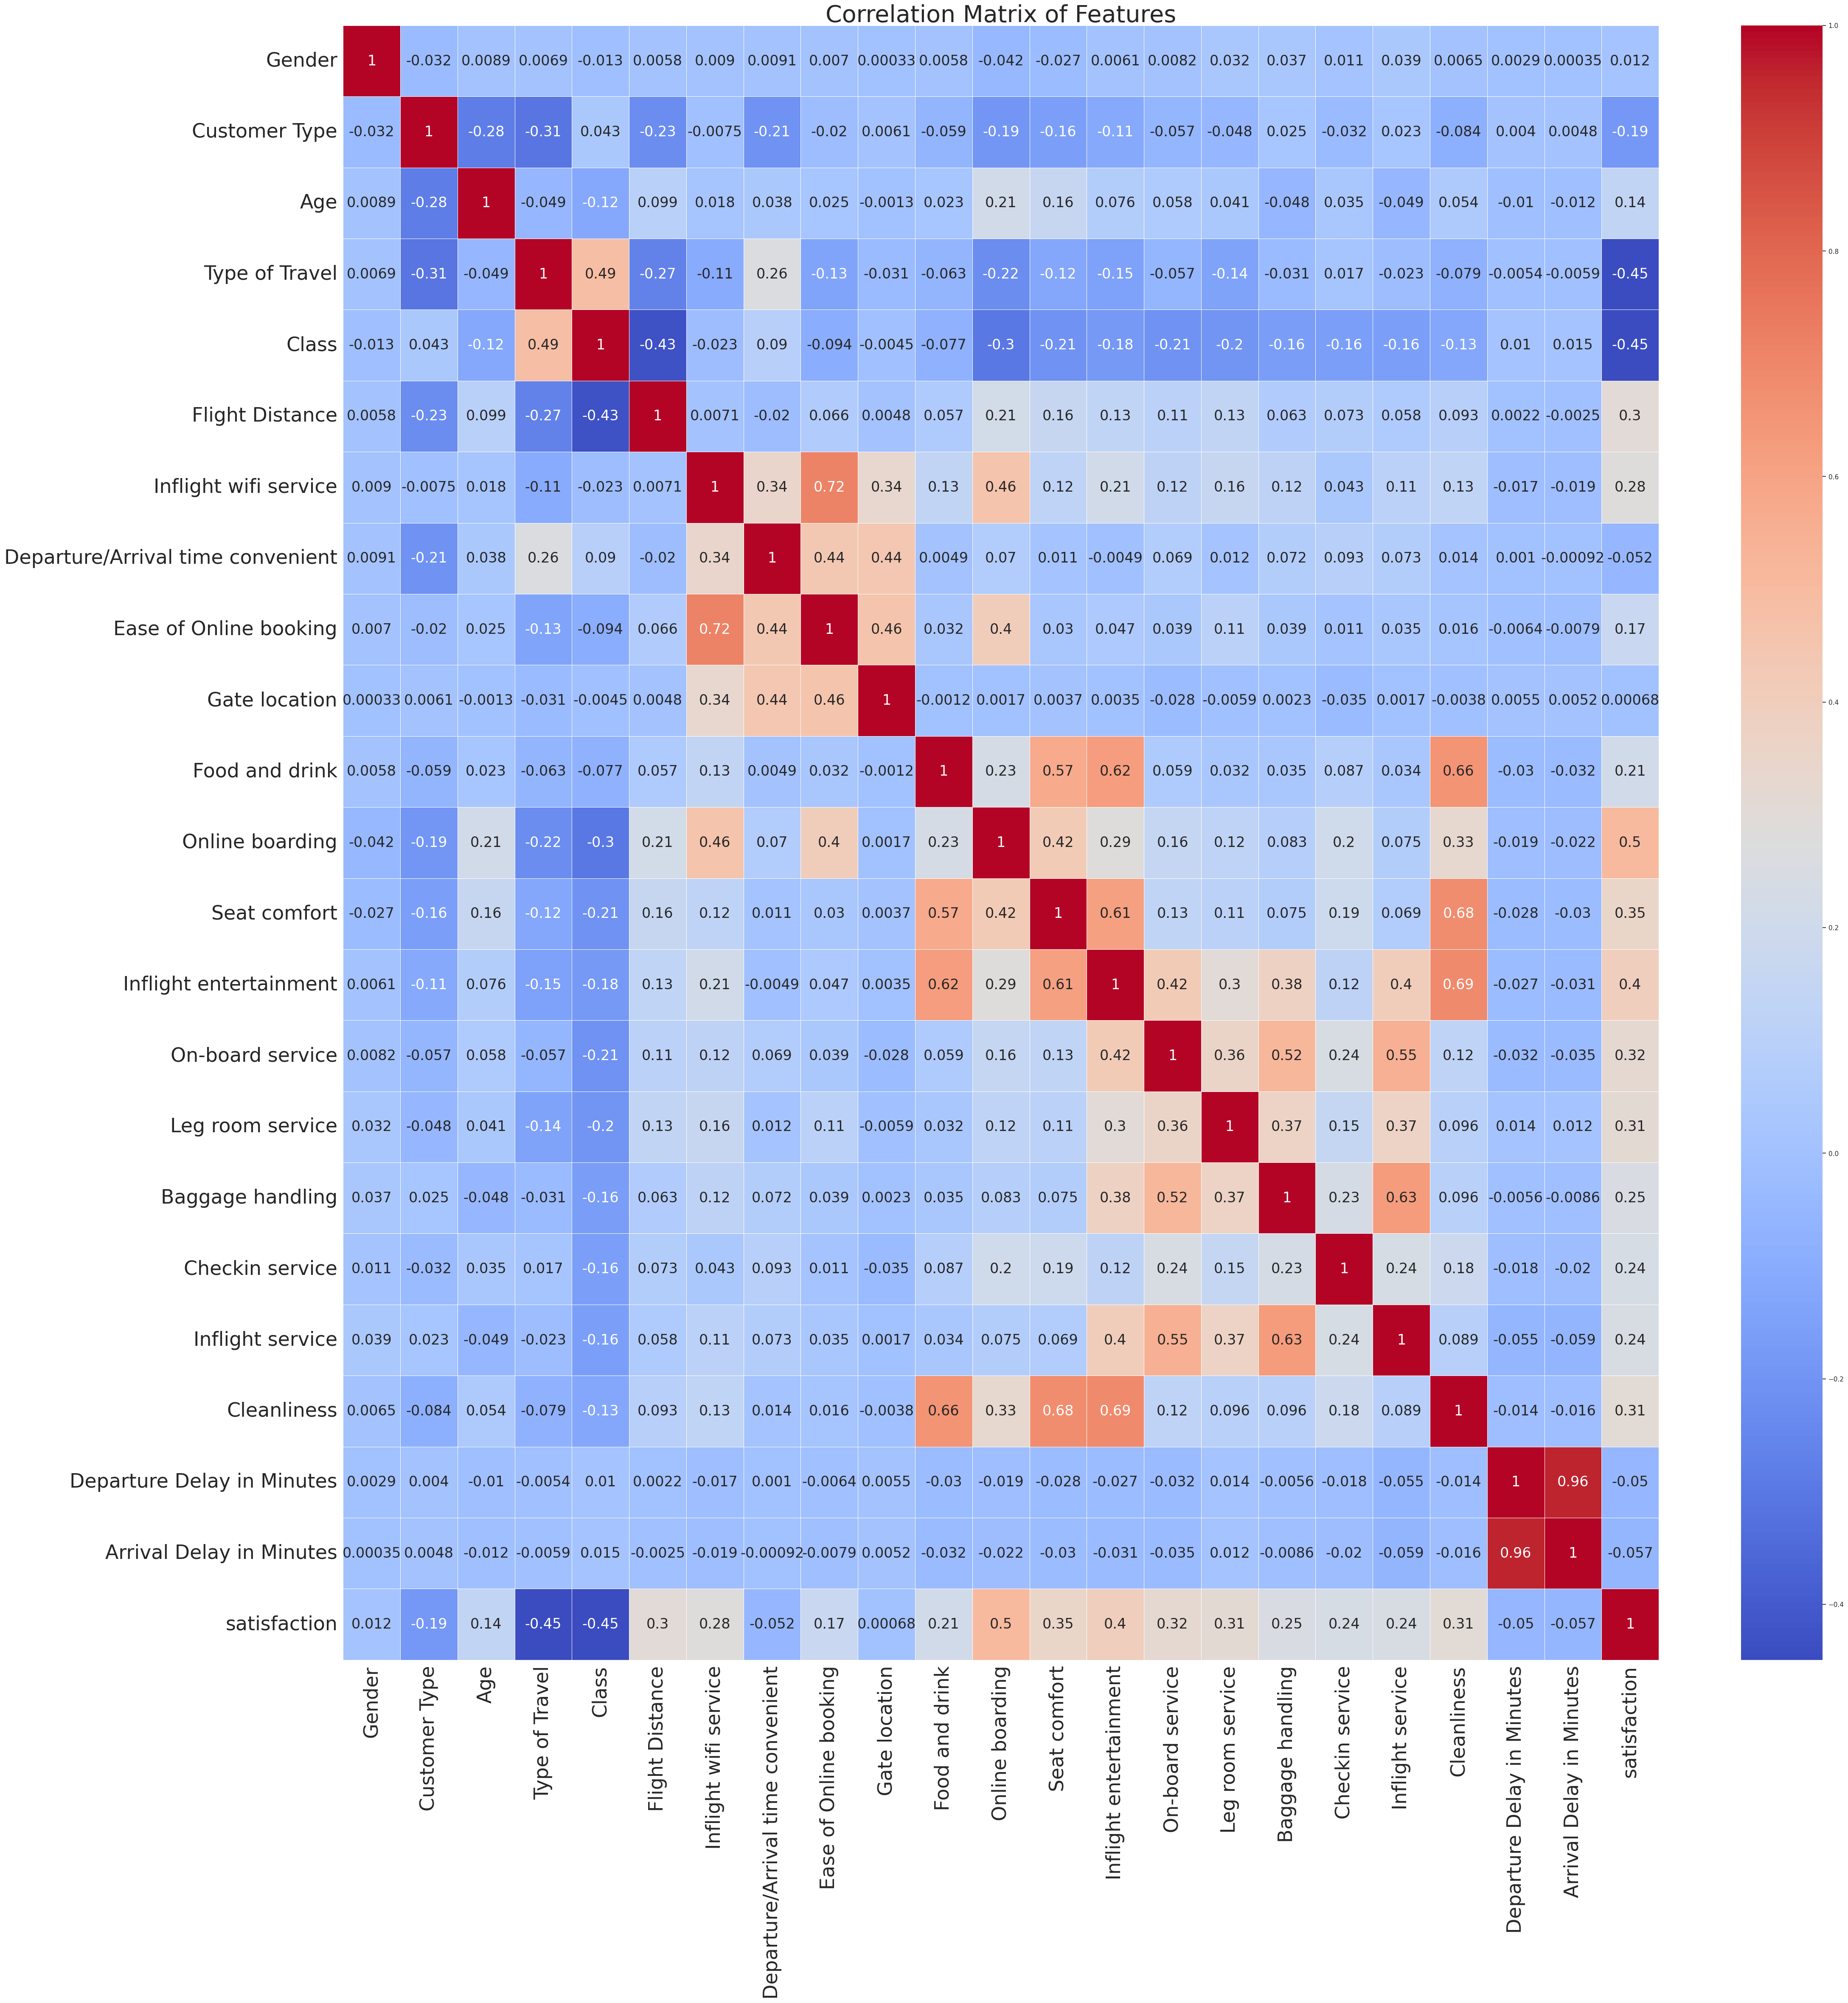

In [6]:
# Calculate the correlation matrix
corr_matrix = cleaned_train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 24})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=33)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=33)

plt.title('Correlation Matrix of Features', fontsize=40)
plt.show()



Top 15 Features: ['Cleanliness', 'Checkin service', 'Inflight service', 'On-board service', 'Age', 'Flight Distance', 'Customer Type', 'Ease of Online booking', 'Seat comfort', 'Leg room service', 'Inflight entertainment', 'Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding']
Cleanliness               float64
Checkin service           float64
Inflight service          float64
On-board service          float64
Age                       float64
Flight Distance           float64
Customer Type               int64
Ease of Online booking    float64
Seat comfort              float64
Leg room service          float64
Inflight entertainment    float64
Type of Travel              int64
Class                       int64
Inflight wifi service     float64
Online boarding           float64
dtype: object


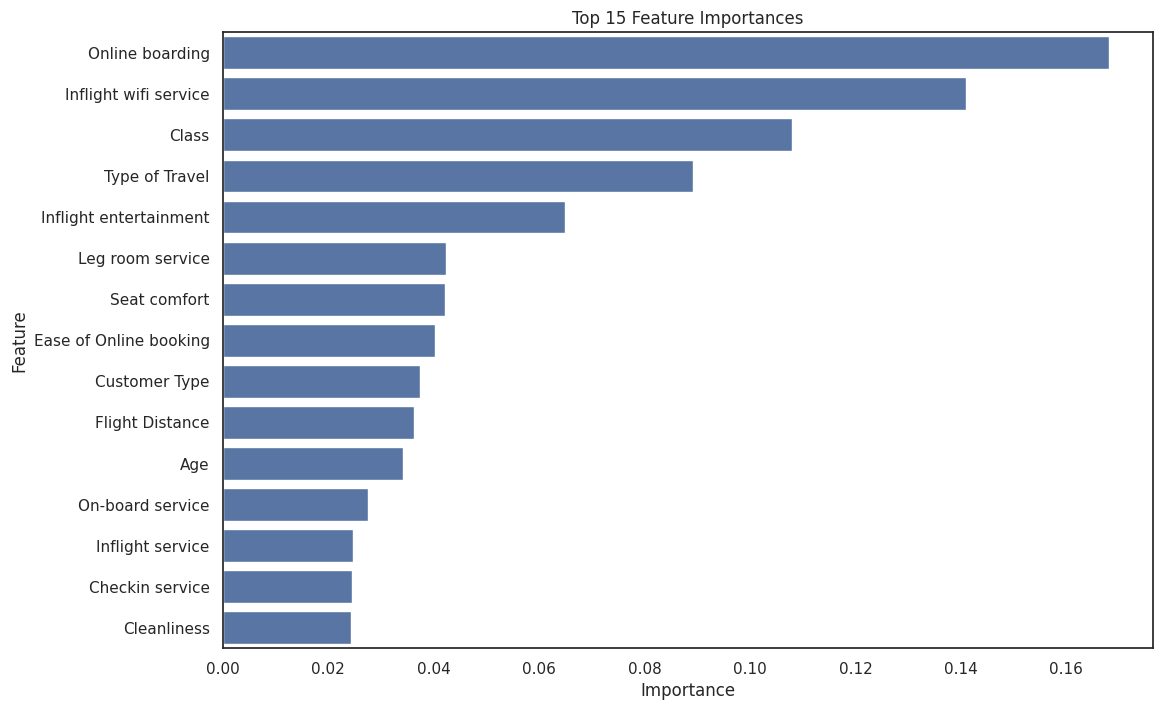

In [7]:
# Prepare features and target
X = cleaned_train_data.drop('satisfaction', axis=1)
y = cleaned_train_data['satisfaction']

# Train-test split for feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get top 15 features
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]
top_15_feature_selected = [X.columns[i] for i in indices]
print("Top 15 Features:", top_15_feature_selected)

top_15_features = X[top_15_feature_selected]
feature_types = top_15_features.dtypes

print(feature_types)

# Create a dataframe for feature importances
feature_importance_df = pd.DataFrame({'Feature': top_15_feature_selected, 'Importance': importances[indices]})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending= False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 15 Feature Importances')
plt.show()


KNN Results:
Accuracy: 0.9327
ROC AUC: 0.9720

Confusion Matrix:
[[11252   461]
 [  938  8130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11713
           1       0.95      0.90      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781


.................................

Naive Bayes Results:
Accuracy: 0.8701
ROC AUC: 0.9276

Confusion Matrix:
[[10625  1088]
 [ 1611  7457]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11713
           1       0.87      0.82      0.85      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.87     20781
weighted avg       0.87      0.87      0.87     20781


.................................

Logistic Regression Resul

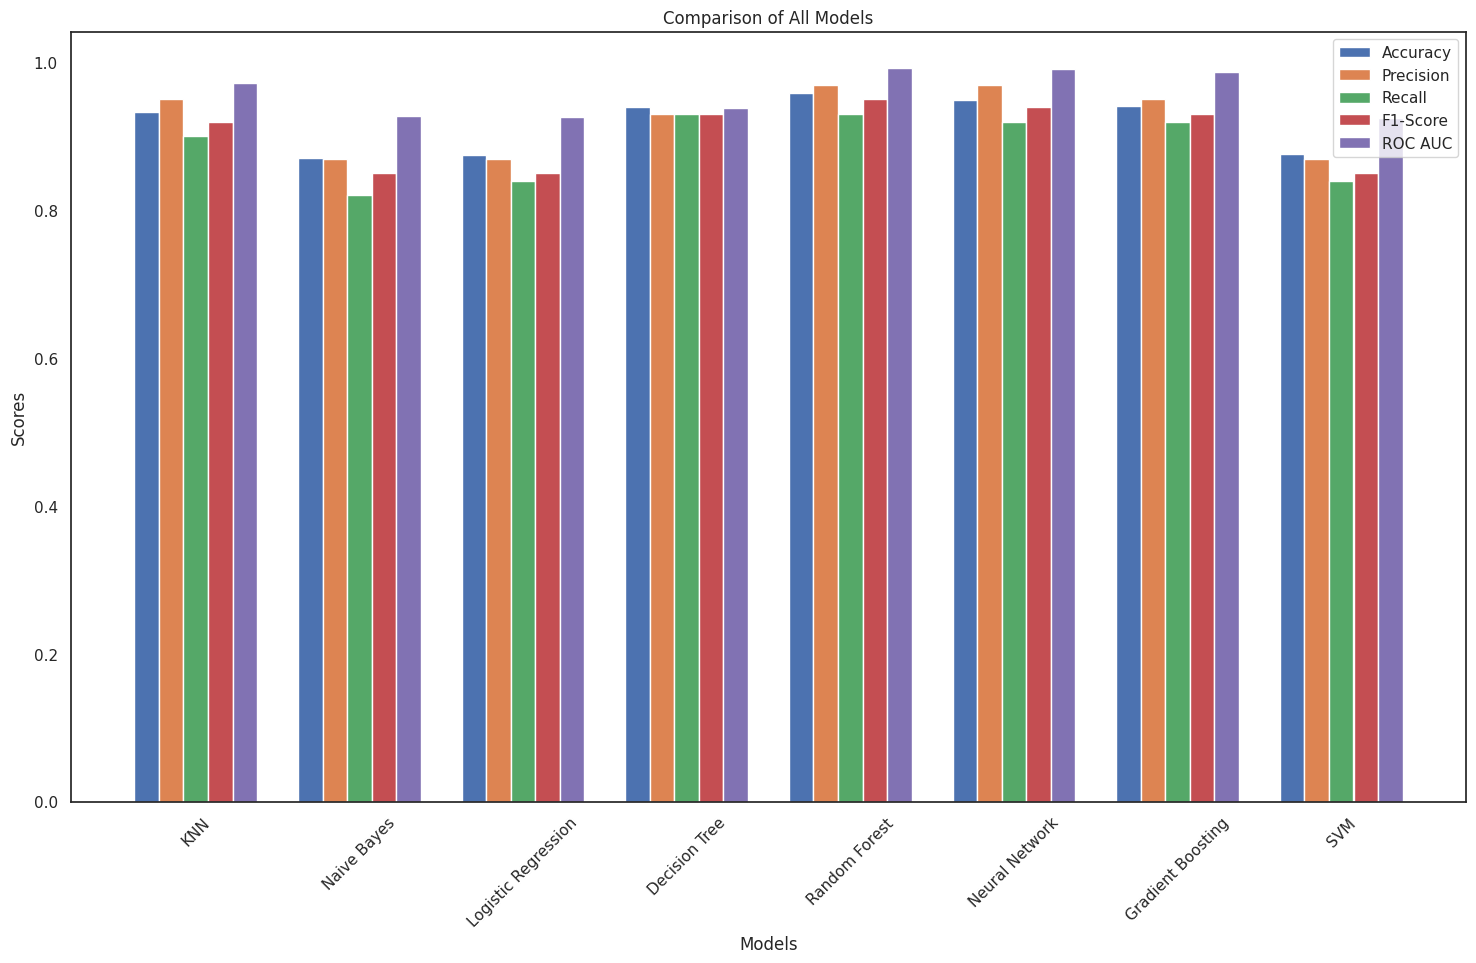

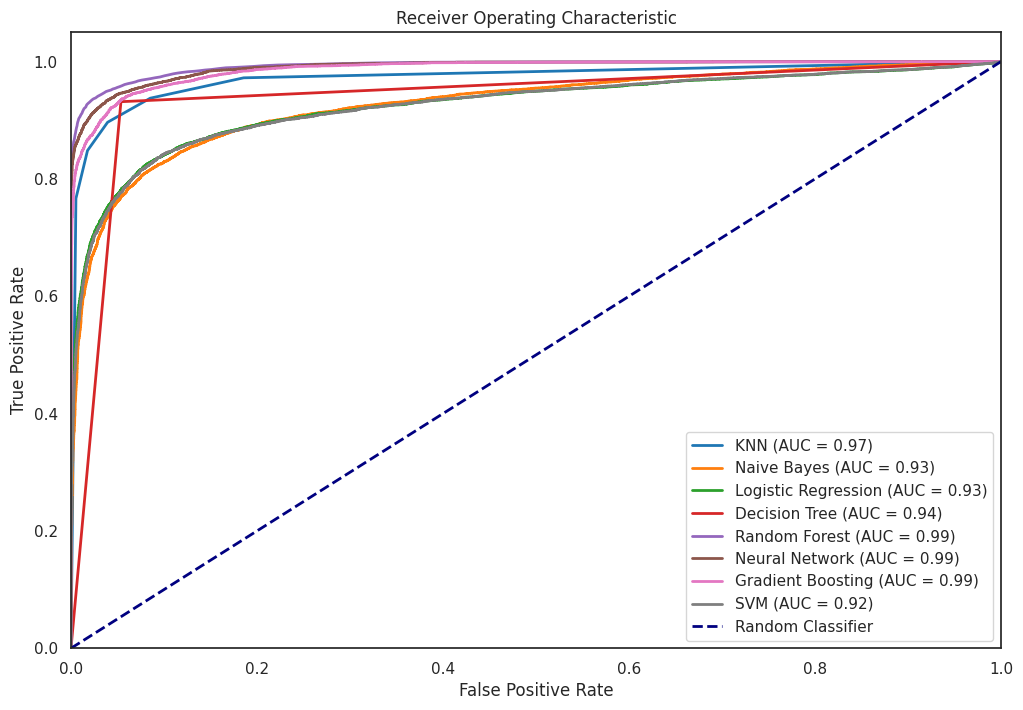

In [8]:
# Initialize models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': LinearSVC(random_state=42, max_iter=2000)
}

# Train-test split
X_selected = cleaned_train_data[top_15_feature_selected]
y_selected = cleaned_train_data['satisfaction']
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Train and evaluate models
results_selected_features = {}
y_test_binarized = label_binarize(y_test_selected, classes=np.unique(y_test_selected))

for name, model in models.items():
    model.fit(X_train_selected, y_train_selected)
    y_pred_selected = model.predict(X_test_selected)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_selected)[:, 1]
    else:
        y_score = model.decision_function(X_test_selected)

    accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
    roc_auc_selected = roc_auc_score(y_test_binarized, y_score)
    conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)
    class_report_selected = classification_report(y_test_selected, y_pred_selected)

    results_selected_features[name] = {
        'accuracy': accuracy_selected,
        'roc_auc': roc_auc_selected,
        'confusion_matrix': conf_matrix_selected,
        'classification_report': class_report_selected
    }

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_selected:.4f}")
    print(f"ROC AUC: {roc_auc_selected:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix_selected)
    print("\nClassification Report:")
    print(class_report_selected)
    print("\n.................................")

# Extract metrics for all models
model_names = list(results_selected_features.keys())
accuracies = [results_selected_features[name]['accuracy'] for name in model_names]
precisions = [float(results_selected_features[name]['classification_report'].split('\n')[3].split()[1]) for name in model_names]  # Extract precision for class 1
recalls = [float(results_selected_features[name]['classification_report'].split('\n')[3].split()[2]) for name in model_names]     # Extract recall for class 1
f1_scores = [float(results_selected_features[name]['classification_report'].split('\n')[3].split()[3]) for name in model_names]  # Extract f1-score for class 1
roc_aucs = [results_selected_features[name]['roc_auc'] for name in model_names]

# Plotting the comparison with additional metrics
fig, ax = plt.subplots(figsize=(18, 10))

x = np.arange(len(model_names))
width = 0.15

# Adjust the positions of the bars for better alignment
bar1 = ax.bar(x - 2*width, accuracies, width, label='Accuracy')
bar2 = ax.bar(x - width, precisions, width, label='Precision')
bar3 = ax.bar(x, recalls, width, label='Recall')
bar4 = ax.bar(x + width, f1_scores, width, label='F1-Score')
bar5 = ax.bar(x + 2*width, roc_aucs, width, label='ROC AUC')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of All Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.show()

# Plot ROC curves for all models
fig, ax2 = plt.subplots(figsize=(12, 8))
colors = plt.colormaps.get_cmap('tab10')

for idx, (name, model) in enumerate(models.items()):
    # Train model
    model.fit(X_train_selected, y_train_selected)

    # Generate ROC curve data
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_selected)[:, 1]
    else:
        y_score = model.decision_function(X_test_selected)

    fpr, tpr, _ = roc_curve(y_test_selected, y_score, pos_label=np.unique(y_test_selected)[1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    ax2.plot(fpr, tpr, lw=2, color=colors(idx), label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random classifier line
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set labels and title
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic')
ax2.legend(loc="lower right")

plt.show()



Top 3 Models:
Model: Random Forest, Score: 0.9598
Model: Neural Network, Score: 0.9535
Model: Gradient Boosting, Score: 0.9449


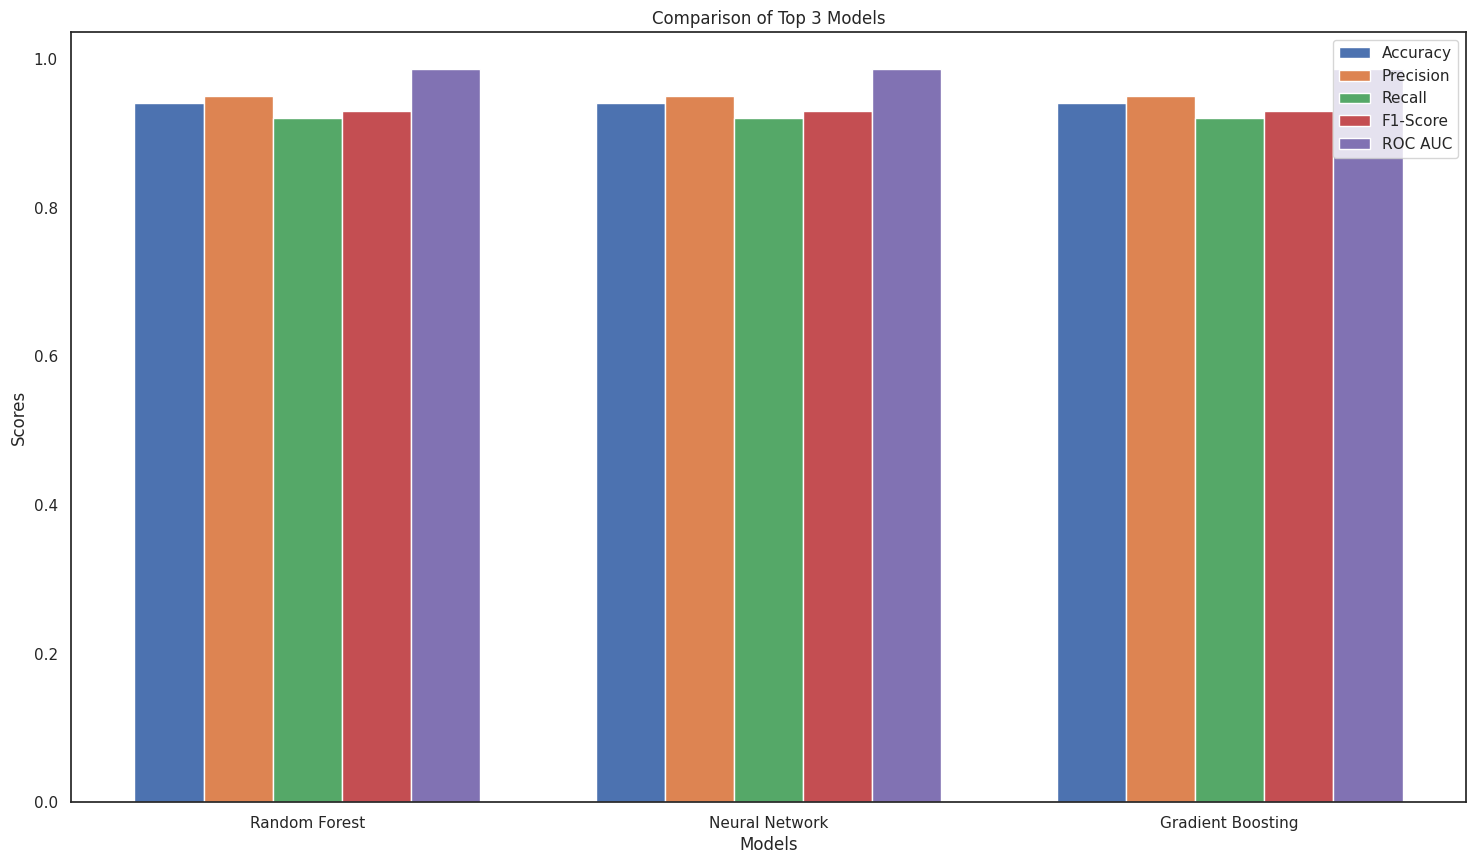

In [9]:
# Function to compare model performances and select top 3 models
def compare_and_select_top_models(results):
    # Calculate a combined score for each model based on multiple metrics
    for model in results.keys():
        accuracy = results[model]['accuracy']
        roc_auc = results[model]['roc_auc']
        precision = float(results[model]['classification_report'].split('\n')[3].split()[1])
        recall = float(results[model]['classification_report'].split('\n')[3].split()[2])
        f1_score = float(results[model]['classification_report'].split('\n')[3].split()[3])
        combined_score = harmonic_mean([accuracy, roc_auc, precision, recall, f1_score])
        results[model]['combined_score'] = combined_score

    # Select top 3 models based on combined score
    sorted_models = sorted(results.items(), key=lambda item: item[1]['combined_score'], reverse=True)
    top_3_models = sorted_models[:3]

    print("\nTop 3 Models:")
    for name, result in top_3_models:
        print(f"Model: {name}, Score: {result['combined_score']:.4f}")

    return top_3_models

# Compare the models and select top 3
top_3_models = compare_and_select_top_models(results_selected_features)

# Plotting the comparison with additional metrics
fig, ax = plt.subplots(figsize=(18, 10))

x = np.arange(len(top_3_models))
width = 0.15

# Extract metrics from the top 3 models
for model in top_3_models:
 accuracies = [model[1]['accuracy'] ]
 precisions = [float(model[1]['classification_report'].split('\n')[3].split()[1]) ]
 recalls = [float(model[1]['classification_report'].split('\n')[3].split()[2]) ]
 f1_scores = [float(model[1]['classification_report'].split('\n')[3].split()[3]) ]
 roc_aucs = [model[1]['roc_auc']]

# Adjust the positions of the bars for better alignment
bar1 = ax.bar(x - 2*width, accuracies, width, label='Accuracy')
bar2 = ax.bar(x - width, precisions, width, label='Precision')
bar3 = ax.bar(x, recalls, width, label='Recall')
bar4 = ax.bar(x + width, f1_scores, width, label='F1-Score')
bar5 = ax.bar(x + 2*width, roc_aucs, width, label='ROC AUC')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Top 3 Models')
ax.set_xticks(x)
ax.set_xticklabels([model[0] for model in top_3_models])
ax.legend()

plt.show()


## Results

## Conclusion

The study utilizes the "Airline Passenger Satisfaction" dataset, which includes variables such as demographics, flight details, and service quality ratings. Key steps include data preprocessing (handling missing data, encoding categorical variables), feature selection, and applying predictive models like logistic regression and random forests. The analysis highlights service quality, seat comfort, and customer service as major contributors to satisfaction, with model performance evaluated using metrics like accuracy and F1-score